<a href="https://colab.research.google.com/github/pathfinderNdoma/water_quality_prediction/blob/main/dataPre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction and Importation of Libraries and dataset

In [ ]:
#Importing needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#read the dataset
df = pd.read_csv('water_data.csv')

In [ ]:
df.head()

,Site,Site Name,Date,Battery (V),Conductivity 25C continuous (uS/cm),Oxygen dissolved continuous (%satn),pH continuous,Temperature water continuous (C),Water level continuous (mm)
0,FP01,Bere Stream at Snatford Bridge,13/11/2002 13:45,12.0,405.0,117.3,8.02,11.4,450.8
1,FP01,Bere Stream at Snatford Bridge,13/11/2002 14:00,12.0,405.0,117.1,8.02,11.4,451.5
2,FP01,Bere Stream at Snatford Bridge,13/11/2002 14:15,12.0,405.0,116.3,8.02,11.4,450.7
3,FP01,Bere Stream at Snatford Bridge,13/11/2002 14:30,12.0,405.0,115.2,8.02,11.3,450.9
4,FP01,Bere Stream at Snatford Bridge,13/11/2002 14:45,12.0,405.0,114.9,8.01,11.3,451.1


In [ ]:
df.shape

(1048575, 9)

## EXPLORATORY DATA ANALYSIS

In [ ]:
#Getting an overview of the dataset, datat type etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   Site                                 1048575 non-null  object 
 1   Site Name                            1048575 non-null  object 
 2   Date                                 1048575 non-null  object 
 3   Battery (V)                          1044351 non-null  float64
 4   Conductivity 25C continuous (uS/cm)  1036499 non-null  float64
 5   Oxygen dissolved continuous (%satn)  1021019 non-null  float64
 6   pH continuous                        1025488 non-null  float64
 7   Temperature water continuous (C)     1034978 non-null  float64
 8   Water level continuous (mm)          1044073 non-null  float64
dtypes: float64(6), object(3)
memory usage: 72.0+ MB


In [ ]:
#Confirming if there is any null value
df.isnull().any()

Site                                   False
Site Name                              False
Date                                   False
Battery (V)                             True
Conductivity 25C continuous (uS/cm)     True
Oxygen dissolved continuous (%satn)     True
pH continuous                           True
Temperature water continuous (C)        True
Water level continuous (mm)             True
dtype: bool

In [ ]:
#Confirming if there is any null value
df.isnull().sum()

Site                                       0
Site Name                                  0
Date                                       0
Battery (V)                             4224
Conductivity 25C continuous (uS/cm)    12076
Oxygen dissolved continuous (%satn)    27556
pH continuous                          23087
Temperature water continuous (C)       13597
Water level continuous (mm)             4502
dtype: int64

In [ ]:
#Describing the datatset to see how it looks like
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
df.describe()

,Battery (V),Conductivity 25C continuous (uS/cm),Oxygen dissolved continuous (%satn),pH continuous,Temperature water continuous (C),Water level continuous (mm)
count,"1,044,351.00","1,036,499.00","1,021,019.00","1,025,488.00","1,034,978.00","1,044,073.00"
mean,12.74,319.86,75.43,7.63,10.91,404.32
std,0.67,133.22,46.72,1.45,4.31,245.37
min,-15.00,0.00,-1.00,0.00,-3.00,-41.60
25%,12.00,291.00,47.40,7.49,8.00,215.00
50%,13.00,363.00,91.60,7.87,10.80,378.00
75%,13.00,406.00,102.50,8.11,14.10,592.20
max,15.00,"1,030.00",516.00,16.98,33.00,"1,949.00"


In [ ]:
#Renaming columns
df = df.rename(columns={'Conductivity 25C continuous (uS/cm)': 'conductivity', 'Oxygen dissolved continuous (%satn)':'do', 'pH continuous': 'ph', 'Temperature water continuous (C)': 'temperature'})

In [ ]:
df.head()

,Site,Site Name,Date,Battery (V),conductivity,do,ph,temperature,Water level continuous (mm)
0,FP01,Bere Stream at Snatford Bridge,13/11/2002 13:45,12.00,405.00,117.30,8.02,11.40,450.80
1,FP01,Bere Stream at Snatford Bridge,13/11/2002 14:00,12.00,405.00,117.10,8.02,11.40,451.50
2,FP01,Bere Stream at Snatford Bridge,13/11/2002 14:15,12.00,405.00,116.30,8.02,11.40,450.70
3,FP01,Bere Stream at Snatford Bridge,13/11/2002 14:30,12.00,405.00,115.20,8.02,11.30,450.90
4,FP01,Bere Stream at Snatford Bridge,13/11/2002 14:45,12.00,405.00,114.90,8.01,11.30,451.10


In [ ]:
df = df[['conductivity', 'do', 'ph', 'temperature']]
#Y = data[['y1']]  # Extract 'y1' into a separate DataFrame 'Y'

In [ ]:
df.head()

,conductivity,do,ph,temperature
0,405.00,117.30,8.02,11.40
1,405.00,117.10,8.02,11.40
2,405.00,116.30,8.02,11.40
3,405.00,115.20,8.02,11.30
4,405.00,114.90,8.01,11.30


In [ ]:
#Removing Missing values
df = df.dropna()
df.head()

,conductivity,do,ph,temperature
0,405.00,117.30,8.02,11.40
1,405.00,117.10,8.02,11.40
2,405.00,116.30,8.02,11.40
3,405.00,115.20,8.02,11.30
4,405.00,114.90,8.01,11.30


In [ ]:
df.describe()

,conductivity,do,ph,temperature
count,"1,007,863.00","1,007,863.00","1,007,863.00","1,007,863.00"
mean,328.16,76.22,7.59,10.99
std,124.38,46.34,1.37,4.25
min,0.00,-1.00,0.00,-3.00
25%,306.00,52.80,7.48,8.10
50%,365.00,91.80,7.86,10.90
75%,407.00,102.60,8.10,14.10
max,"1,030.00",516.00,16.82,33.00


In [ ]:
#Checking the new shape of the data
df.shape

(1007863, 4)

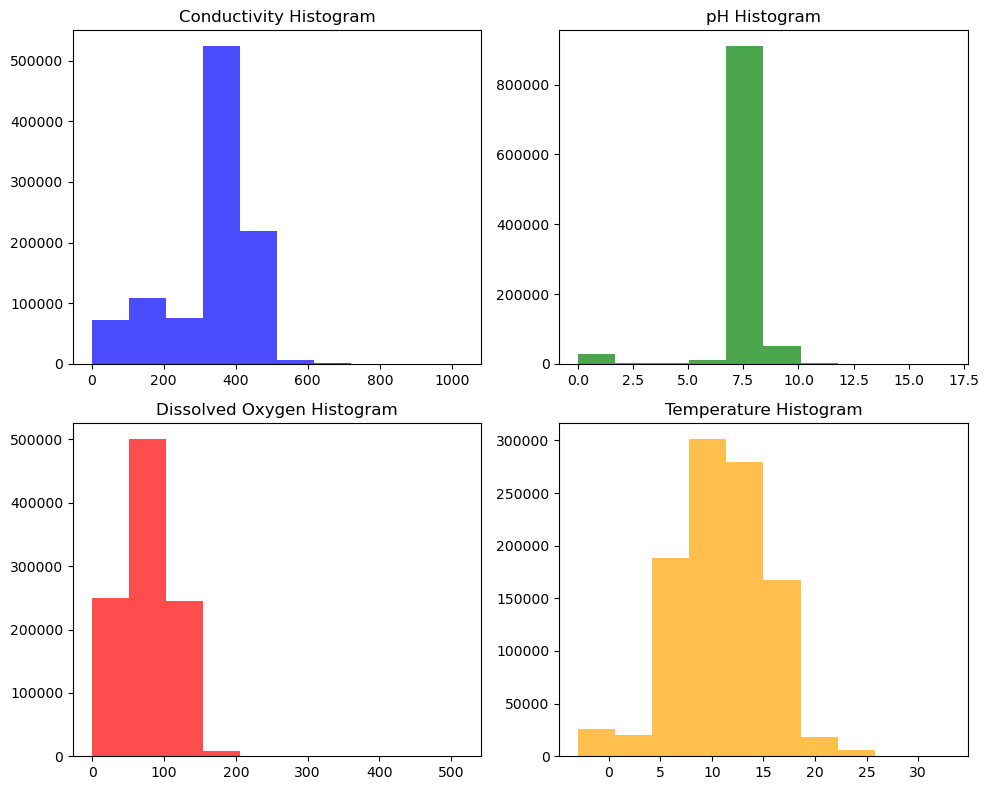

In [ ]:
# Create a 2x2 grid of subplots for the histograms
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot histograms for each column
axes[0, 0].hist(df["conductivity"], bins=10, color='blue', alpha=0.7)
axes[0, 0].set_title("Conductivity Histogram")
axes[0, 1].hist(df["ph"], bins=10, color='green', alpha=0.7)
axes[0, 1].set_title("pH Histogram")
axes[1, 0].hist(df["do"], bins=10, color='red', alpha=0.7)
axes[1, 0].set_title("Dissolved Oxygen Histogram")
axes[1, 1].hist(df["temperature"], bins=10, color='orange', alpha=0.7)
axes[1, 1].set_title("Temperature Histogram")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


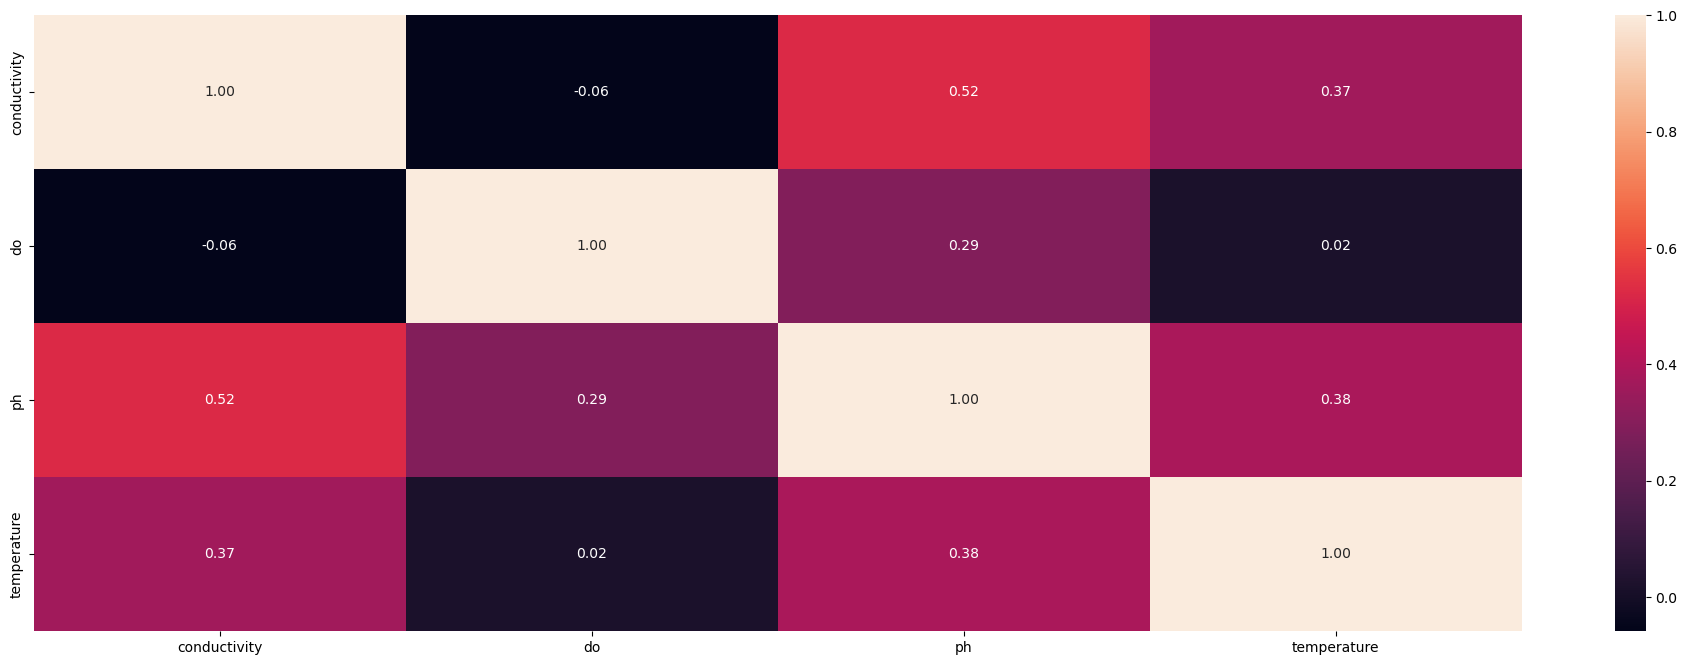

In [ ]:
#Plot of correlation
plt.figure(figsize=(24,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f");

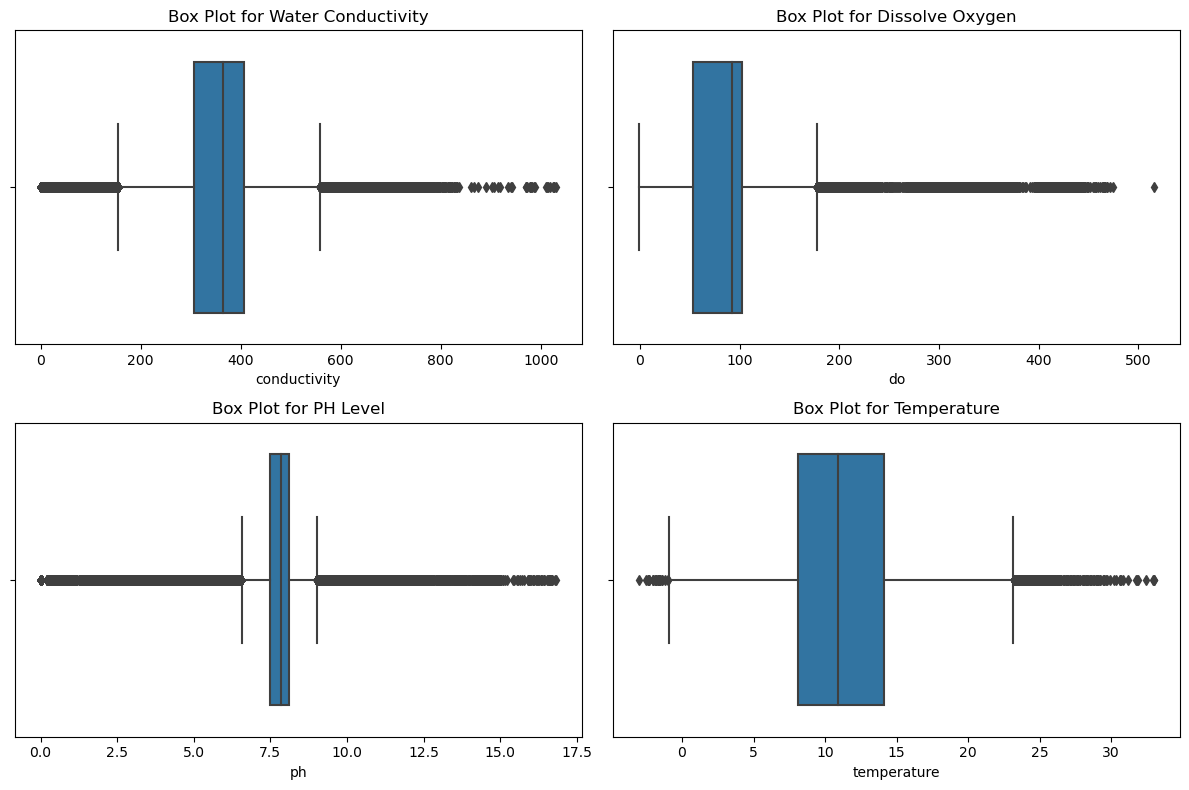

In [ ]:
# Create a 2x2 subplot for four box plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Create box plots using Seaborn
sns.boxplot(x=df['conductivity'], ax=axes[0, 0])
sns.boxplot(x=df['do'], ax=axes[0, 1])
sns.boxplot(x=df['ph'], ax=axes[1, 0])
sns.boxplot(x=df['temperature'], ax=axes[1, 1])

# Add titles and labels for each subplot
axes[0, 0].set_title('Box Plot for Water Conductivity')
axes[0, 1].set_title('Box Plot for Dissolve Oxygen')
axes[1, 0].set_title('Box Plot for PH Level')
axes[1, 1].set_title('Box Plot for Temperature')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Create a 2x2 subplot for four line plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Create line plots using Seaborn
sns.barplot(data=df, x=df.index, y='conductivity', ax=axes[0, 0])
#sns.barplot(data=df, x=df.index, y='do', ax=axes[0, 1])
#sns.barlot(data=df, x=df.index, y='ph', ax=axes[1, 0])
#sns.barlot(data=df, x=df.index, y='temperature', ax=axes[1, 1])

# Add titles and labels for each subplot
axes[0, 0].set_title('Line Plot for Conductivity')
#axes[0, 1].set_title('Line Plot for Dissolved Oxygen')
#axes[1, 0].set_title('Line Plot for PH values')
#axes[1, 1].set_title('Line Plot for Temperature')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
